In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Q1 multilinear regression 
#toyota dataset

In [3]:
data1=pd.read_csv("ToyotaCorolla.csv")
data1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
data1.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


# EDA

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data=pd.concat([data1.iloc[:,2:4],data1.iloc[:,6:7],data1.iloc[:,8:9],data1.iloc[:,12:14],data1.iloc[:,15:18]],axis=1)
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
data2=data.rename({'Age_08_04':'age','cc':'CC','Quarterly_Tax':'tax'},axis=1)

In [43]:
data2

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data2[data2.duplicated()]

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
data3=data2.drop_duplicates().reset_index(drop=True)
data3

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [46]:
data3.corr()

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


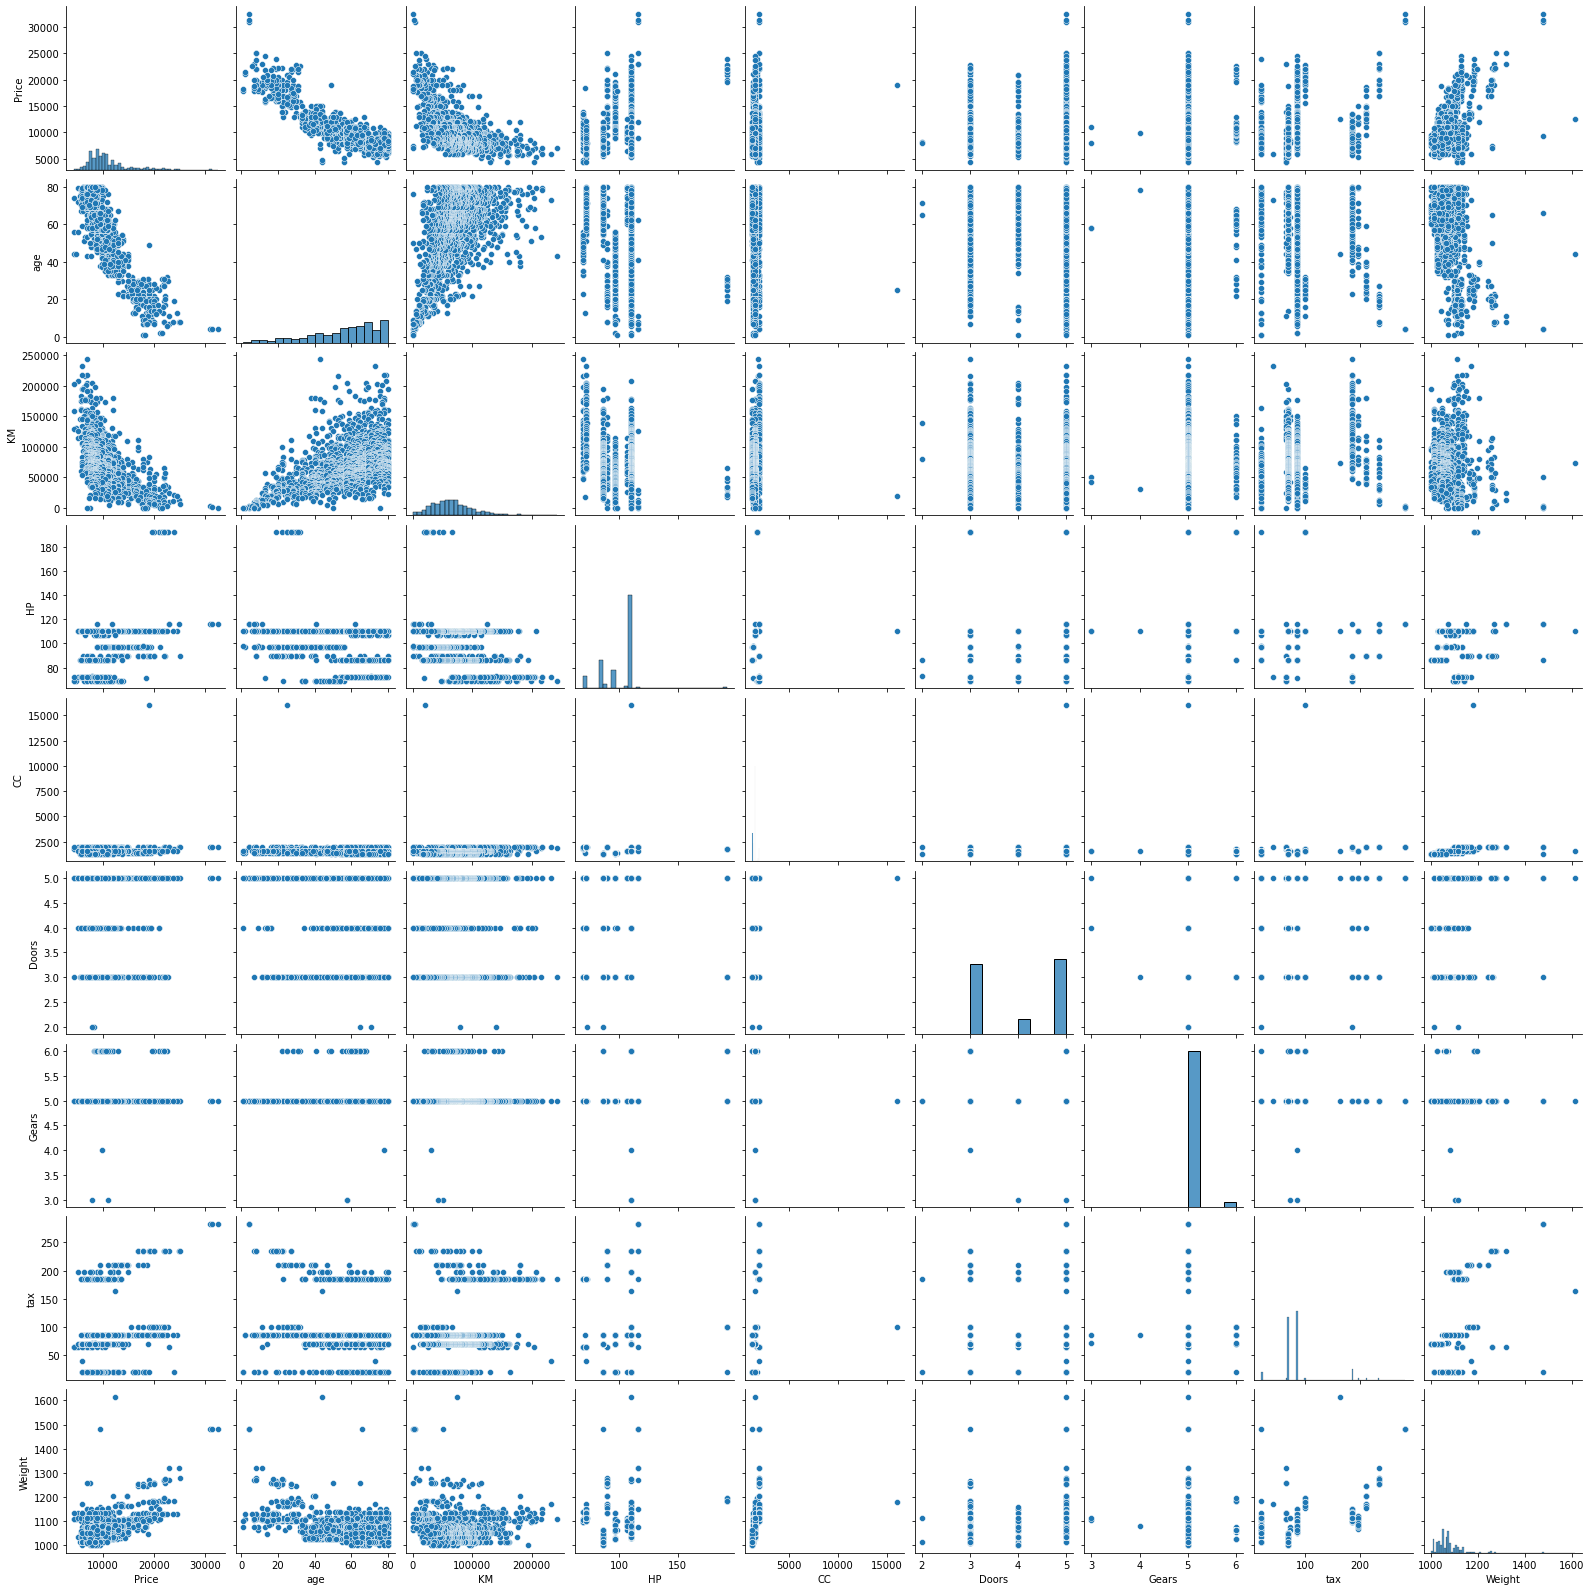

In [17]:
sns.pairplot(data3)

# MODEL PREPRATION

In [8]:
model=smf.ols('Price~age+ KM+HP+CC+Doors+Gears+tax+Weight',data=data3).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:11:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SLR MODELS
SLR=SIMPLE LINEAR REGRESSION 

In [9]:
#since the p value of cc and doors are greater than 0.05 so we consider those columns
# we create SLR model seperately 
slr_CC=smf.ols('Price~CC',data=data3).fit()
slr_CC.tvalues, slr_CC.pvalues  

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [10]:
slr_doors=smf.ols('Price~Doors',data=data3).fit()
slr_doors.tvalues, slr_doors.pvalues 

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [11]:
slr_CC_doors=smf.ols('Price~CC+Doors',data=data3).fit()
slr_CC_doors.tvalues, slr_CC_doors.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [12]:
#checking collinearity problem 
#calculate vif =1/(1-R^2)
#variance inflation factor

rsq_age=smf.ols('age~KM+HP+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_age=1/(1-rsq_age)


rsq_KM=smf.ols('KM~age+HP+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_KM=1/(1-rsq_KM)


rsq_HP=smf.ols('HP~age+KM+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_HP=1/(1-rsq_HP)


rsq_CC=smf.ols('CC~age+KM+HP+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_CC=1/(1-rsq_CC)


rsq_Doors=smf.ols('Doors~age+KM+HP+CC+Gears+tax+Weight',data=data3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)


rsq_Gears=smf.ols('Gears~age+KM+HP+CC+Doors+tax+Weight',data=data3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)


rsq_tax=smf.ols('tax~age+KM+HP+CC+Doors+Gears+Weight',data=data3).fit().rsquared
vif_tax=1/(1-rsq_tax)


rsq_Weight=smf.ols('Weight~age+KM+HP+CC+Doors+Gears+tax',data=data3).fit().rsquared
vif_Weight=1/(1-rsq_Weight)




In [13]:
d1={'veriables':['age','KM','HP','CC','Doors','Gears','tax','Weight'],
   'vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_tax,vif_Weight]}
vif=pd.DataFrame(d1)
vif

,veriables,vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,tax,2.295375
7,Weight,2.487180


# residual analysis
#test for normality of residuals (q-q plot)

C:\Users\91840\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


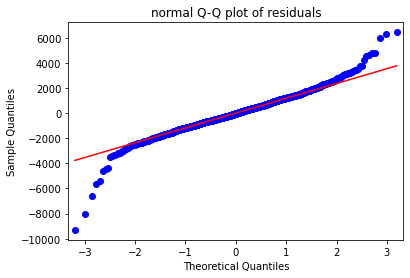

In [14]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()

In [15]:
list(np.where(model.resid>6000))
#to detect the outliar from the above qq plot of residual

[array([109, 146, 522], dtype=int64)]

In [17]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# residual plot for homoscandasticity

In [28]:
# Test whether Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)


def get_standard_values( vals ):
    return (vals-vals.mean())/vals.std()

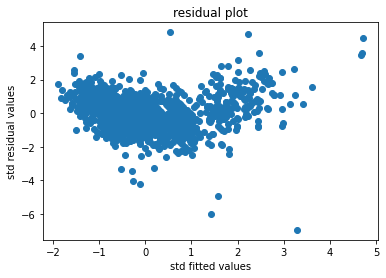

In [29]:
plt.scatter(get_standard_values(model.fittedvalues),get_standard_values(model.resid))
plt.title('residual plot')
plt.ylabel('std residual values')
plt.xlabel('std fitted values')
plt.show()

In [ ]:
# test for errors of residuals vs regressors

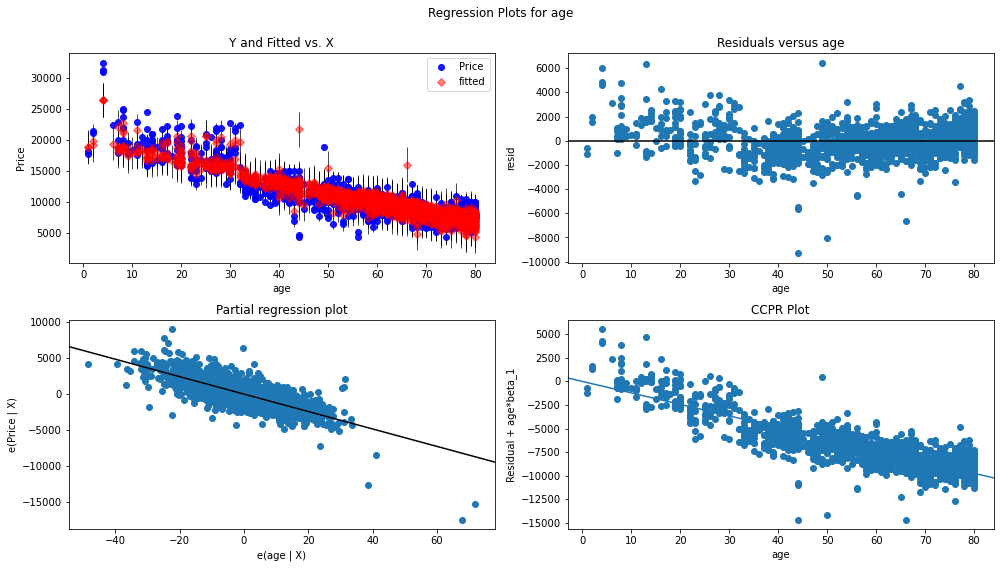

In [30]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

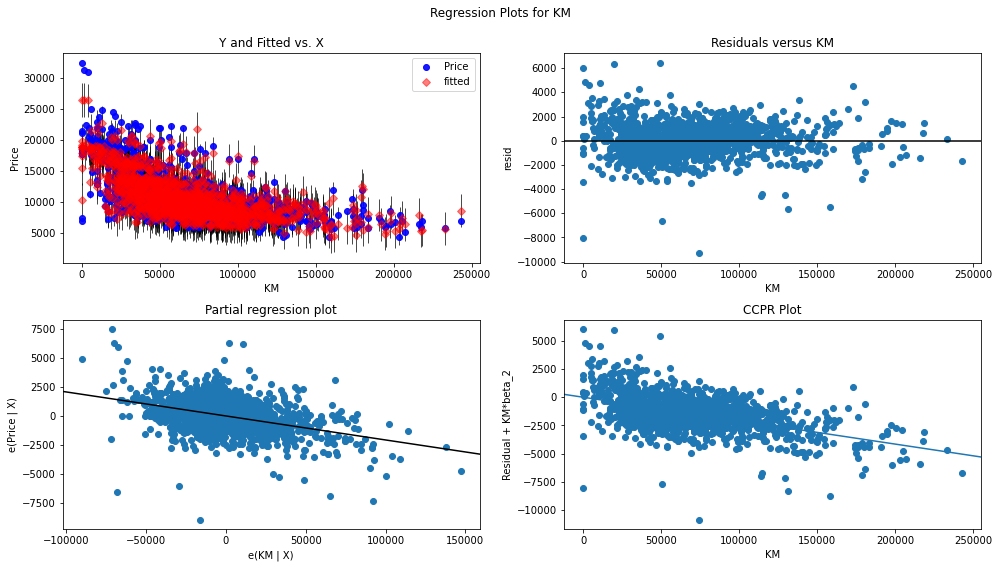

In [31]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

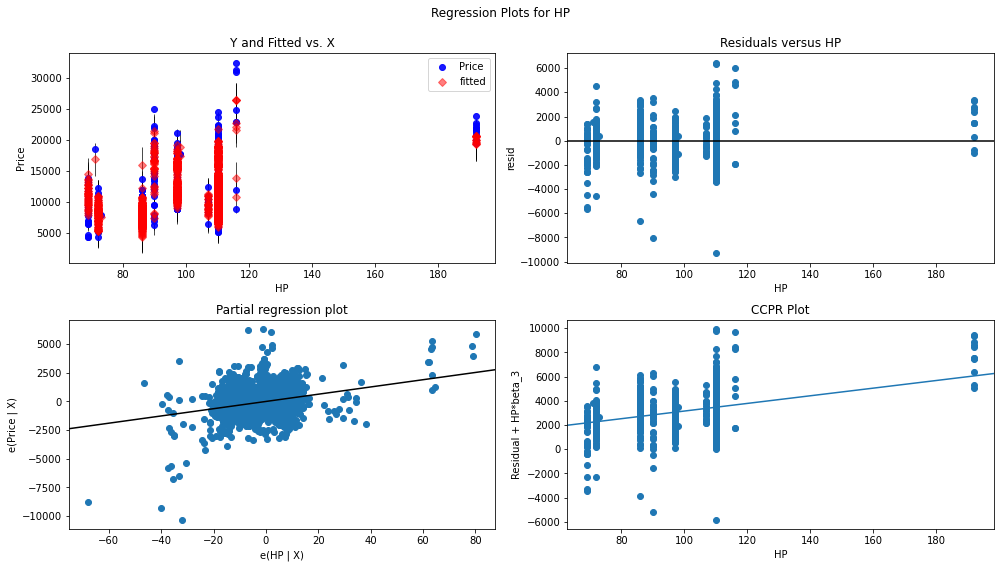

In [32]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

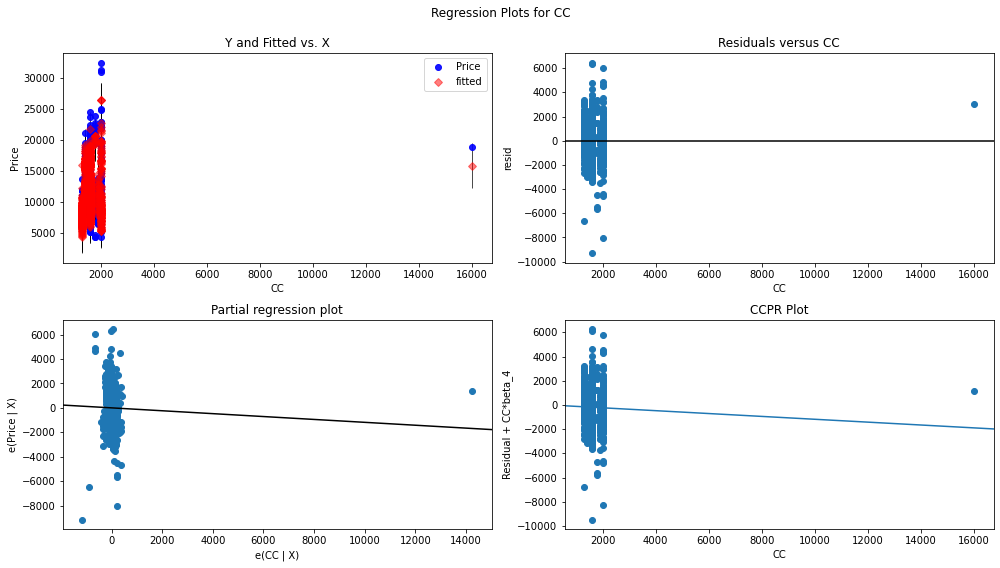

In [33]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

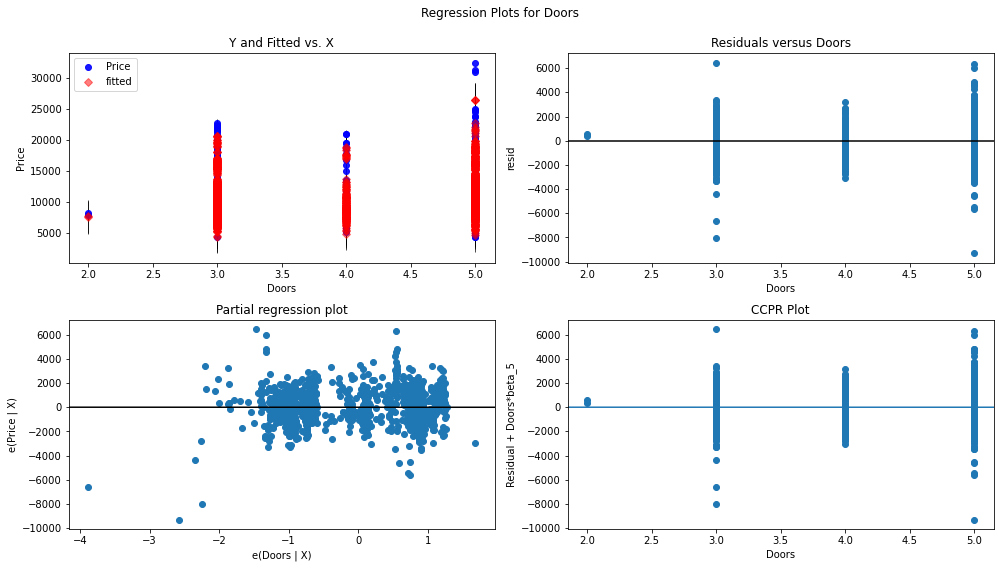

In [34]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

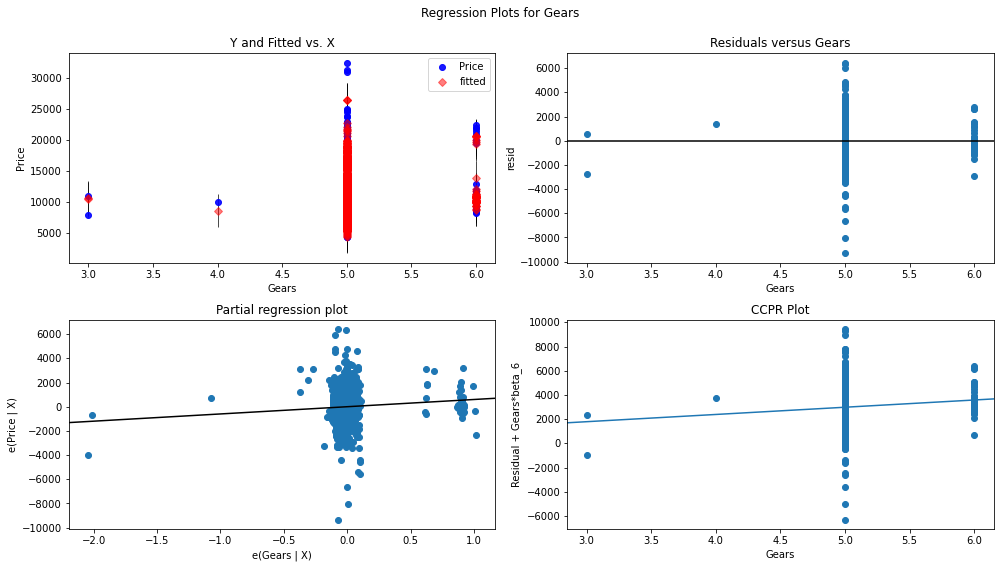

In [35]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

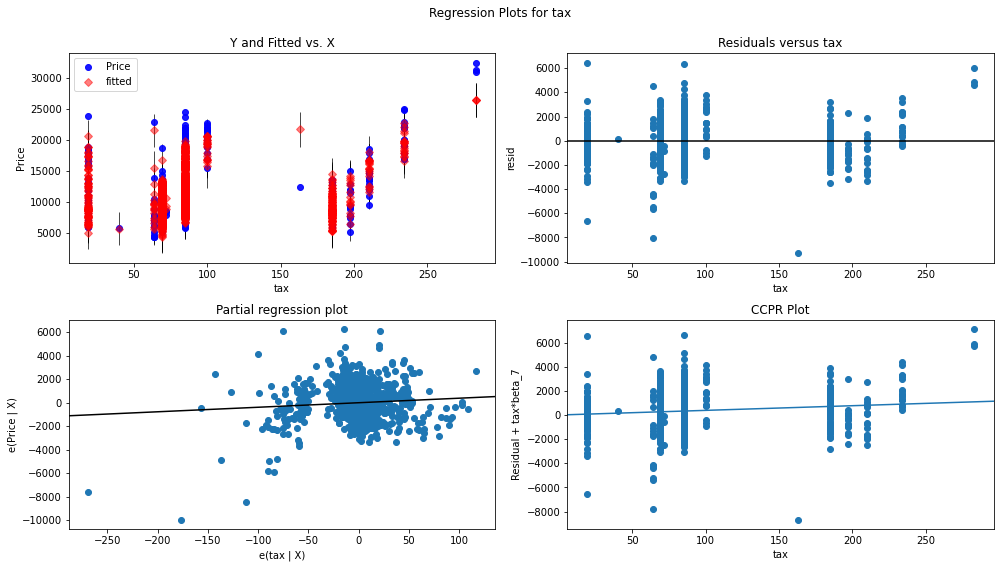

In [36]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

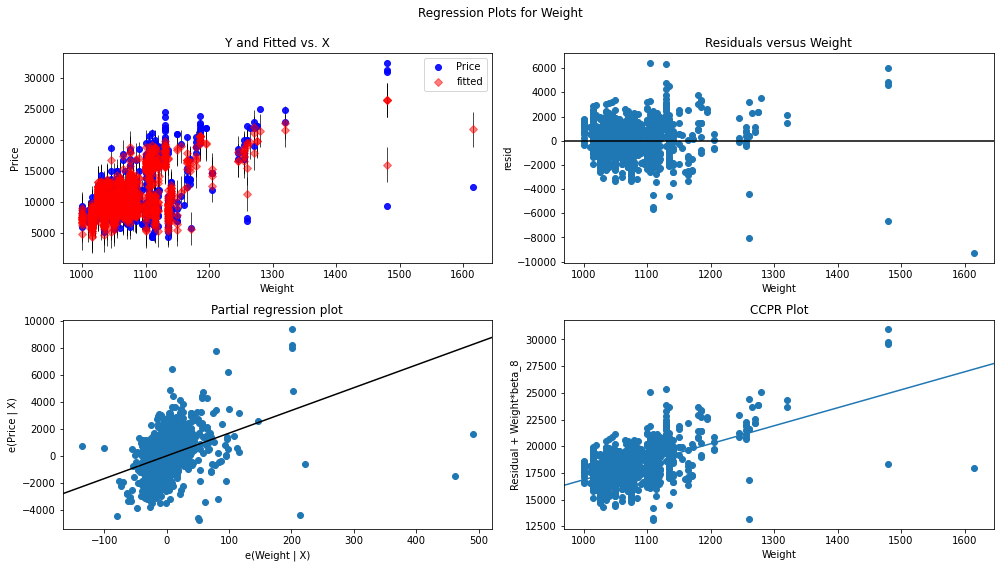

In [37]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# model deletion( checking outliers)
#by using cooks distance

In [38]:
# if coosk distance > 1 then it is declered as an outlier
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

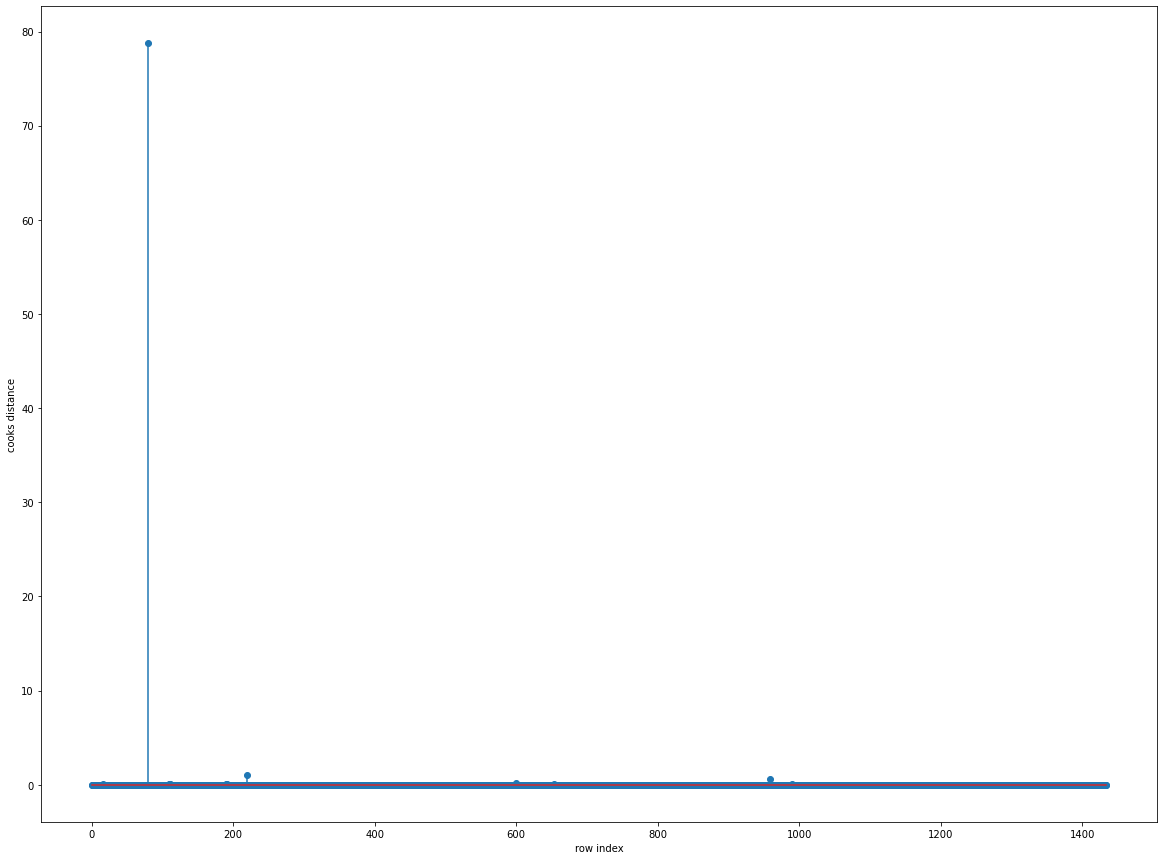

In [41]:
#detecting the influencers using the stem plot 
fig=plt.figure(figsize=(20,15))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [42]:
np.argmax(c),np.max(c)
#values of index and influencers 
# where values of c > 0.5

(80, 78.7295058224851)

# high influence points

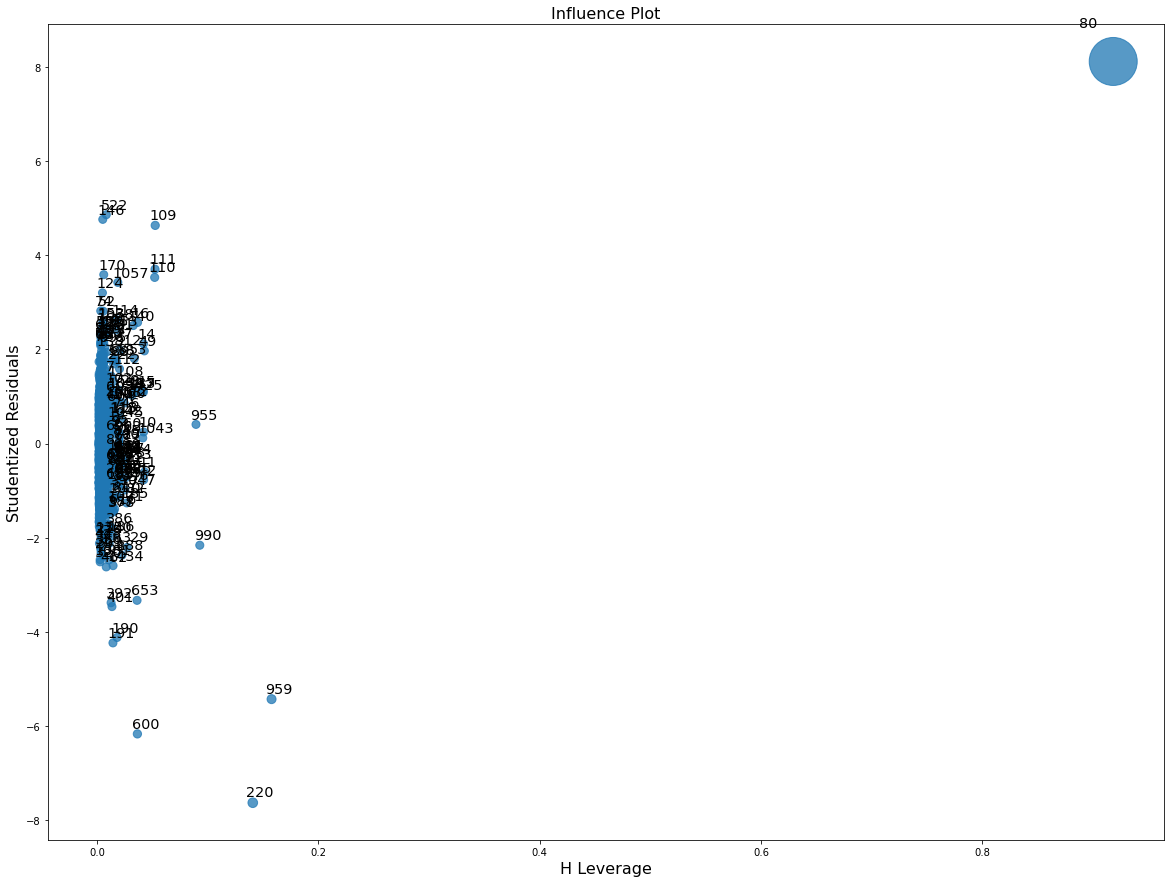

In [43]:
#using leverage value using high influence points 
fig,ax=plt.subplots(figsize=(20,15))
fig=influence_plot(model,ax=ax)

In [44]:
#leverage cutoff value= 3(k+1)/n
#k=no of features/columns 
# n= data points 
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [47]:
#from the above influence plot the index 80 is influenced
data3[data3.index.isin([80])]

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# imporving of model

In [49]:
#creating copy of the data
data4=data3.copy()
data4

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [50]:
#dropping data points which are influenced and ressign(row wise)
data5=data4.drop(data4.index[[80]],axis=0).reset_index(drop=True)
data5

,Price,age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [52]:
#execute variable and generate r squared and AIC values
finalmodel=smf.ols('Price~age+KM+HP+CC+Doors+Gears+tax+Weight',data=data5).fit()

In [53]:
finalmodel.rsquared,finalmodel.aic

(0.8681163912634053, 24669.363894157)

# predicting new data

In [56]:
sampledata=pd.DataFrame({'age':23,'KM':72000,'HP':90,'CC':2000,'Doors':3,'Gears':5,'tax':19,'Weight':1025},index=[1])

In [57]:
sampledata

,age,KM,HP,CC,Doors,Gears,tax,Weight
1,23,72000,90,2000,3,5,19,1025


In [58]:
finalmodel.predict(sampledata)

1    11551.747166
dtype: float64

In [59]:
pred_price=finalmodel.predict(data5)
pred_price

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64